импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import Trainer,Transformer
import numpy as np
#путь к корню директории
PATH_TO = 'D:/pg/air/'
sys.path.append(os.path.abspath(PATH_TO))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = PATH_TO + 'data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.many_to_many(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = Transformer( 
    input_dim = X_train.shape[2], # window_size*num_features - 1
    hidden_dim = 72, # hidden_dim%num_heads == 0
    output_dim = target_window_size,
    num_heads = 12,
    num_layers = 1,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [6]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=100,
    loss_tube=5
)

Epoch 10
Main: 29.278788, MAPE: 0.129782
Test - MAPE: 0.135430, Tube: 0.228125
Epoch 20
Main: 29.279159, MAPE: 0.129462
Test - MAPE: 0.135430, Tube: 0.228125
Epoch 40
Main: 29.187782, MAPE: 0.128968
Test - MAPE: 0.135430, Tube: 0.228125
Epoch 60
Main: 29.342407, MAPE: 0.129647
Test - MAPE: 0.135430, Tube: 0.228125
Epoch 80
Main: 29.324012, MAPE: 0.129497
Test - MAPE: 0.135430, Tube: 0.228125
Epoch 100
Main: 29.386236, MAPE: 0.129735
Test - MAPE: 0.135430, Tube: 0.228125


In [7]:
LV = LossVisualizer(history)




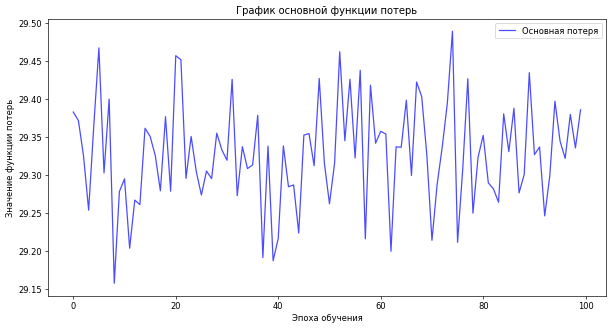

In [8]:
LV.show_training_loss()

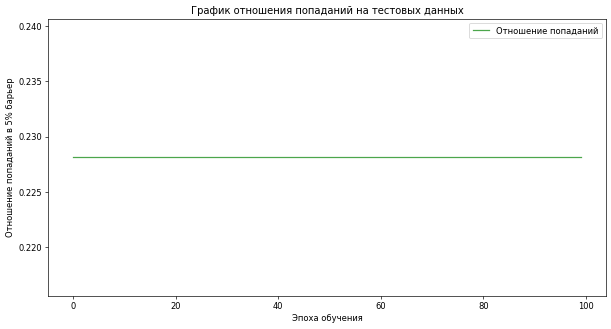

In [9]:
LV.show_test_tube()

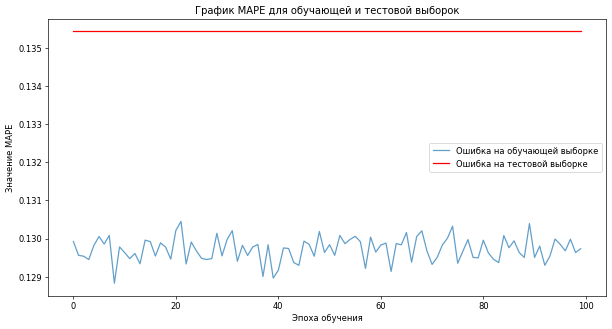

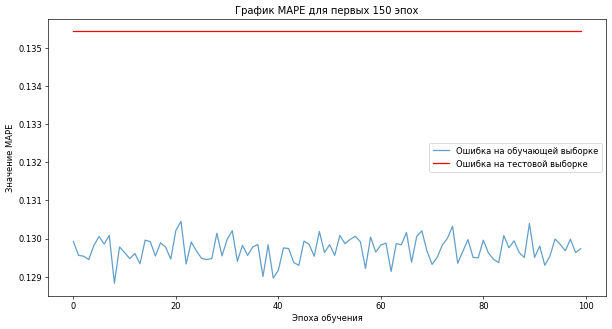

In [10]:
LV.show_mape()

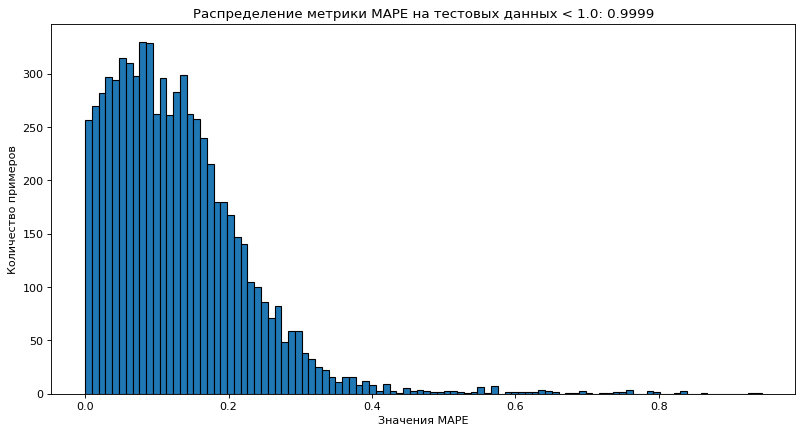

Процент значений MAPE < 1.0: 0.9999


In [11]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100)

Количество записей: 5334


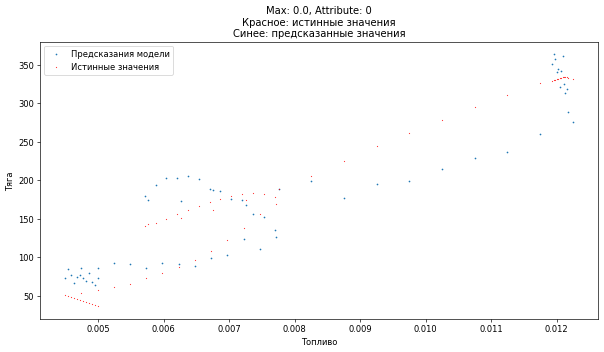

Количество записей: 5334


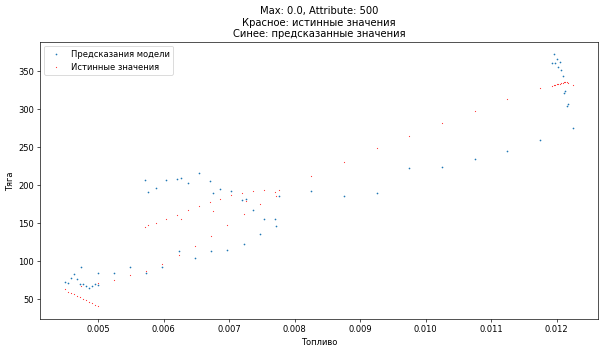

Количество записей: 5334


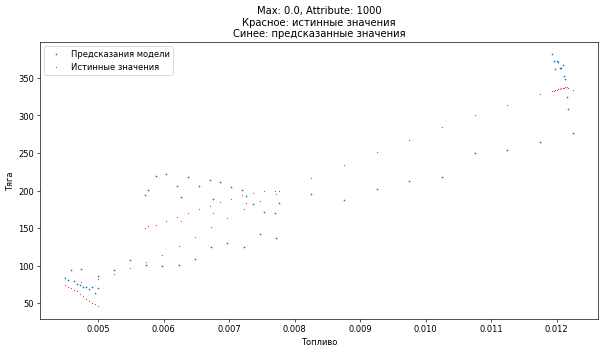

Количество записей: 5334


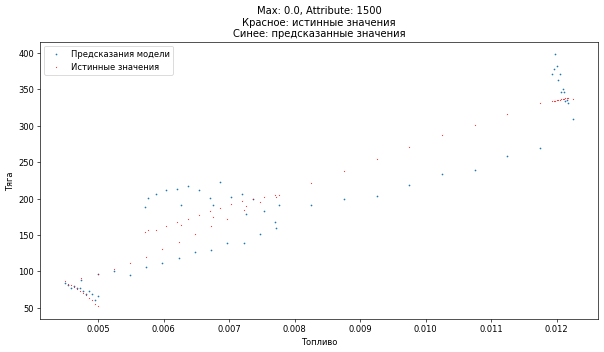

Количество записей: 5334


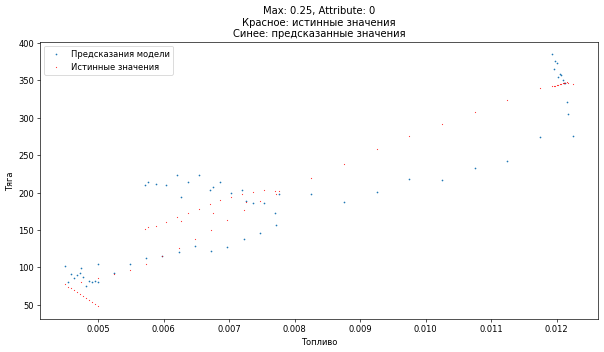

Количество записей: 5334


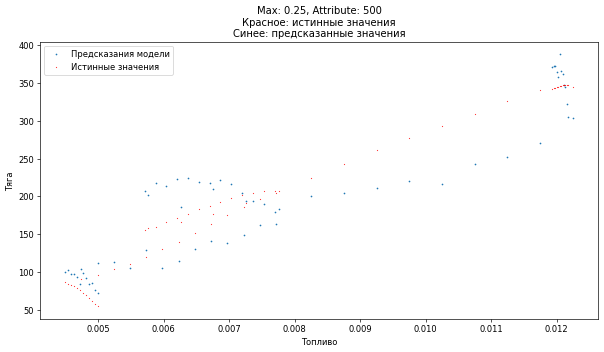

Количество записей: 5334


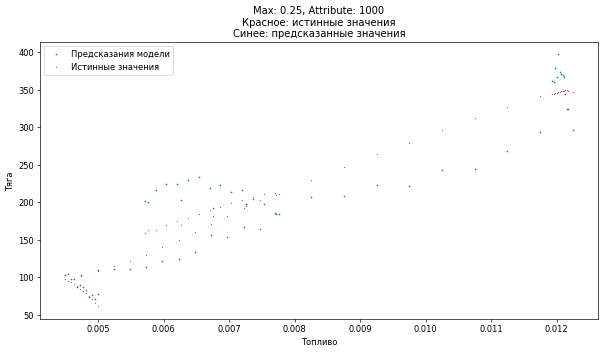

Количество записей: 5334


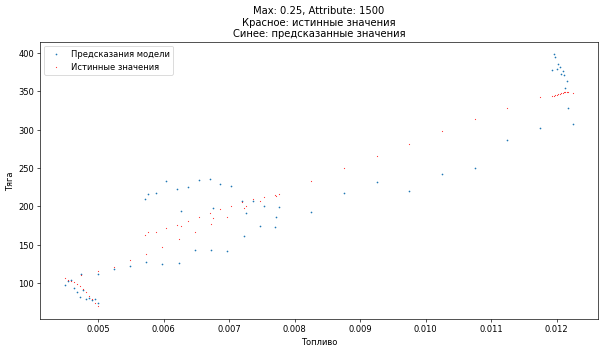

Количество записей: 5334


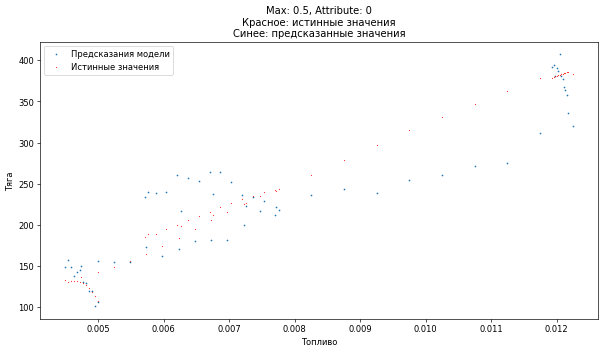

Количество записей: 5334


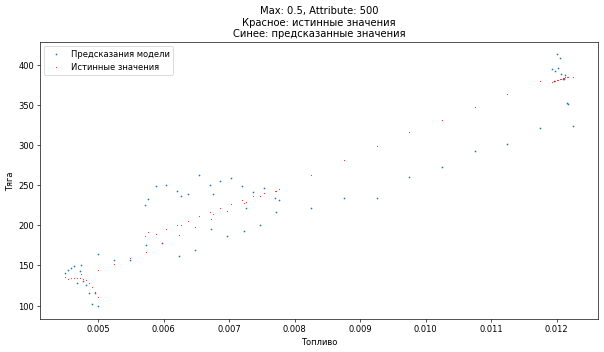

Количество записей: 5334


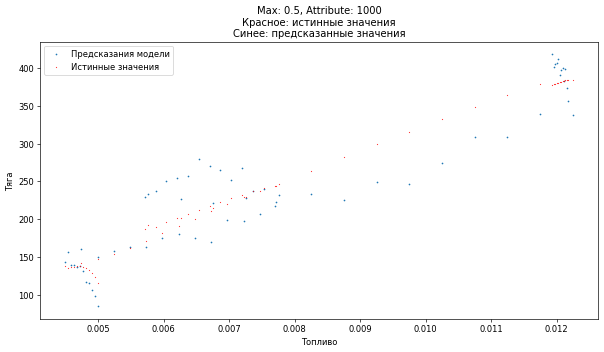

Количество записей: 5334


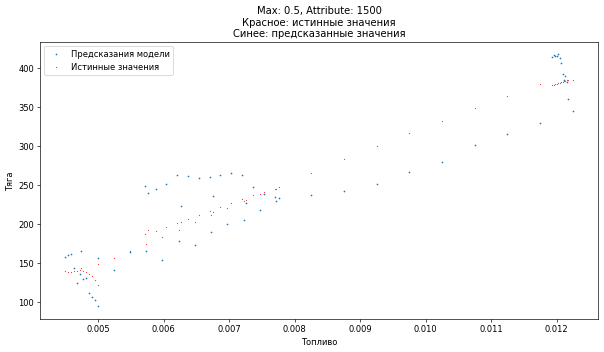

Количество записей: 5334


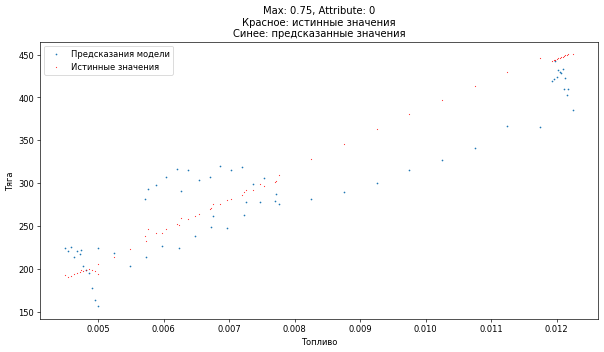

Количество записей: 5334


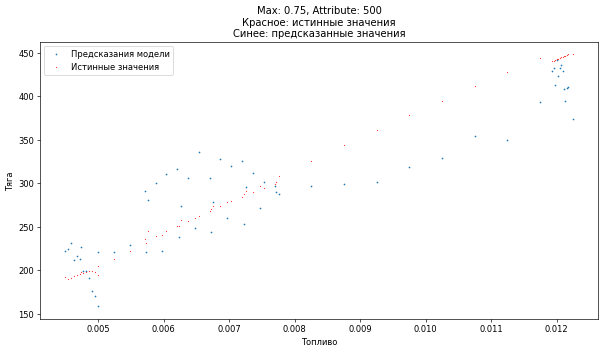

Количество записей: 5334


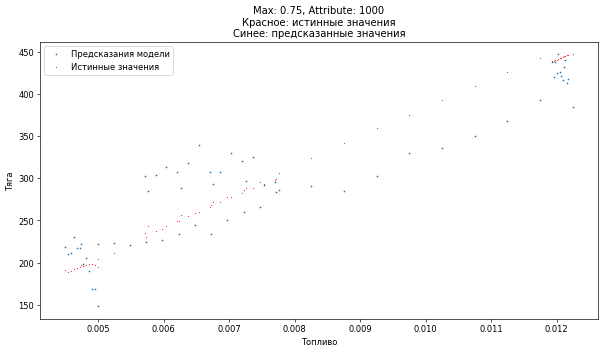

Количество записей: 5334


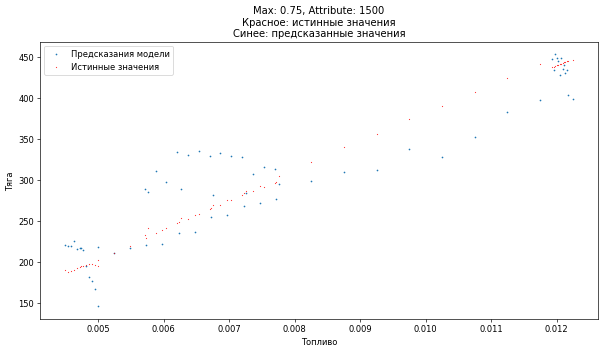

Количество записей: 5334


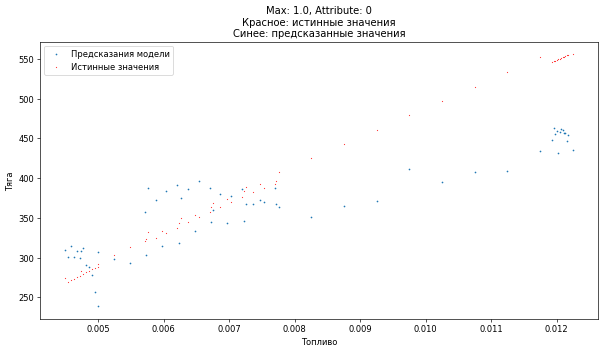

Количество записей: 5334


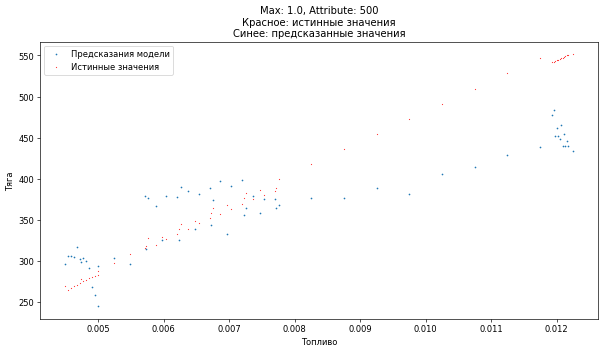

Количество записей: 5334


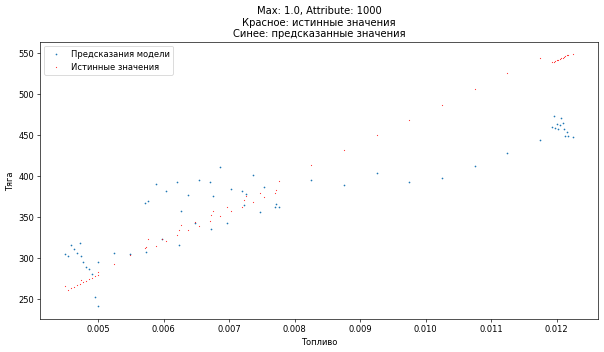

Количество записей: 5334


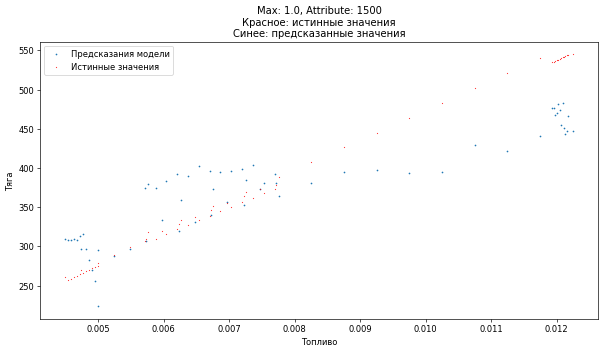

In [12]:
LV.show_predictions_rnn(model,df,pd_params,device)